In [2]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import pickle

In [3]:
from google.colab import files
files.upload()

Saving iris.csv to iris.csv


{'iris.csv': b'SL,SW,PL,PW,Classification\r\n5.1,3.5,1.4,0.2,Iris-setosa\r\n4.9,3,1.4,0.2,Iris-setosa\r\n4.7,3.2,1.3,0.2,Iris-setosa\r\n4.6,3.1,1.5,0.2,Iris-setosa\r\n5,3.6,1.4,0.2,Iris-setosa\r\n5.4,3.9,1.7,0.4,Iris-setosa\r\n4.6,3.4,1.4,0.3,Iris-setosa\r\n5,3.4,1.5,0.2,Iris-setosa\r\n4.4,2.9,1.4,0.2,Iris-setosa\r\n4.9,3.1,1.5,0.1,Iris-setosa\r\n5.4,3.7,1.5,0.2,Iris-setosa\r\n4.8,3.4,1.6,0.2,Iris-setosa\r\n4.8,3,1.4,0.1,Iris-setosa\r\n4.3,3,1.1,0.1,Iris-setosa\r\n5.8,4,1.2,0.2,Iris-setosa\r\n5.7,4.4,1.5,0.4,Iris-setosa\r\n5.4,3.9,1.3,0.4,Iris-setosa\r\n5.1,3.5,1.4,0.3,Iris-setosa\r\n5.7,3.8,1.7,0.3,Iris-setosa\r\n5.1,3.8,1.5,0.3,Iris-setosa\r\n5.4,3.4,1.7,0.2,Iris-setosa\r\n5.1,3.7,1.5,0.4,Iris-setosa\r\n4.6,3.6,1,0.2,Iris-setosa\r\n5.1,3.3,1.7,0.5,Iris-setosa\r\n4.8,3.4,1.9,0.2,Iris-setosa\r\n5,3,1.6,0.2,Iris-setosa\r\n5,3.4,1.6,0.4,Iris-setosa\r\n5.2,3.5,1.5,0.2,Iris-setosa\r\n5.2,3.4,1.4,0.2,Iris-setosa\r\n4.7,3.2,1.6,0.2,Iris-setosa\r\n4.8,3.1,1.6,0.2,Iris-setosa\r\n5.4,3.4,1.5,0.

In [4]:
iris = pd.read_csv("iris.csv")

In [6]:
iris.head(5)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.info() # basic info of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris['Classification'].value_counts() # to display the number of samples

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

Preprocessing

In [11]:
iris.isnull().sum() # null value checking

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Exploratory Data Analysis

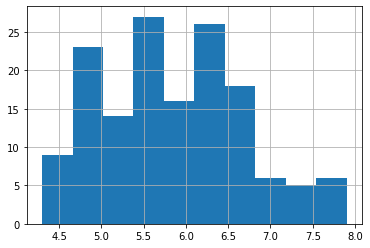

In [12]:
# Histograms
iris['SL'].hist()

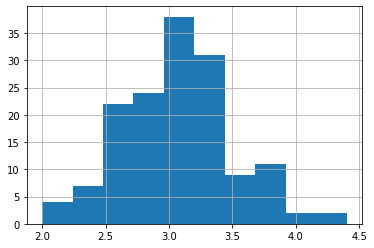

In [13]:
iris['SW'].hist()

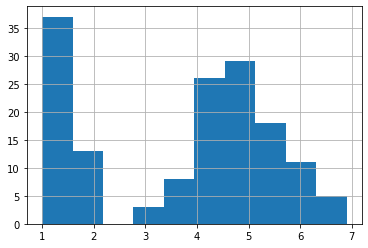

In [14]:
iris['PL'].hist()

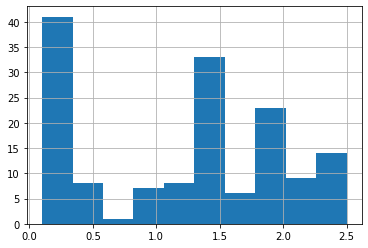

In [15]:
iris['PW'].hist()

In [16]:
# Scatterplot
colors = ['red','orange','blue']
Classification = ['Iris-setosa','Iris-versicolor','Iris-virginica']

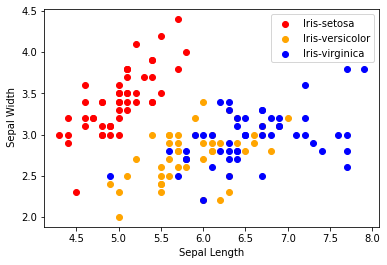

In [20]:
for i in range(3):
  x = iris[iris['Classification']==Classification[i]]
  plt.scatter(x['SL'],x['SW'], c= colors[i], label =Classification[i] )
  plt.xlabel('Sepal Length')
  plt.ylabel(' Sepal Width')
  plt.legend()

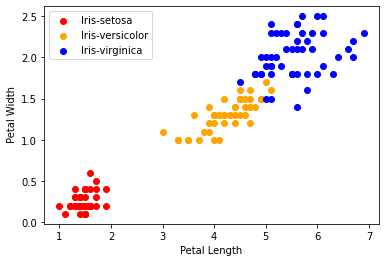

In [21]:
for i in range(3):
  x = iris[iris['Classification']==Classification[i]]
  plt.scatter(x['PL'],x['PW'], c= colors[i], label =Classification[i] )
  plt.xlabel('Petal Length')
  plt.ylabel(' Petal Width')
  plt.legend()

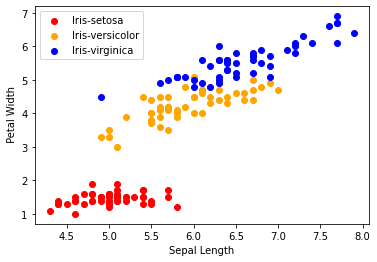

In [22]:
for i in range(3):
  x = iris[iris['Classification']==Classification[i]]
  plt.scatter(x['SL'],x['PL'], c= colors[i], label =Classification[i] )
  plt.xlabel('Sepal Length')
  plt.ylabel(' Petal Width')
  plt.legend()

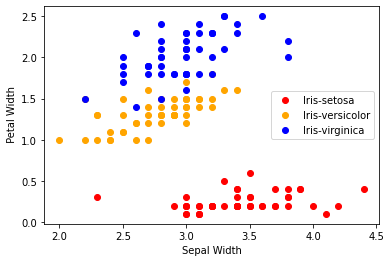

In [23]:
for i in range(3):
  x = iris[iris['Classification']==Classification[i]]
  plt.scatter(x['SW'],x['PW'], c= colors[i], label =Classification[i] )
  plt.xlabel('Sepal Width')
  plt.ylabel(' Petal Width')
  plt.legend()

In [24]:
# Coorelation Matrix
iris.corr()

,SL,SW,PL,PW
SL,1.000000,-0.109369,0.871754,0.817954
SW,-0.109369,1.000000,-0.420516,-0.356544
PL,0.871754,-0.420516,1.000000,0.962757
PW,0.817954,-0.356544,0.962757,1.000000


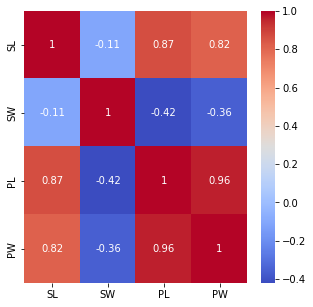

In [32]:
corr = iris.corr()
fig, ax = plt.subplots (figsize=(5,5))
sns.heatmap(corr, annot=True, ax = ax, cmap = 'coolwarm')

In [34]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
iris['Classification'] = le.fit_transform(iris['Classification'])

In [38]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
# Model Training
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X= iris.drop(columns = ['Classification'])
Y = iris['Classification']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30)

In [43]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [53]:
model.fit(x_train, y_train)

LogisticRegression()

In [59]:
print('Accuracy:', model.score (x_test,y_test)*100)

Accuracy: 97.77777777777777


In [56]:
## kNN 
from sklearn .neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [57]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [58]:
print('Accuracy:', model.score (x_test,y_test)*100)

Accuracy: 97.77777777777777


In [60]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [61]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
print('Accuracy:', model.score (x_test,y_test)*100)

Accuracy: 93.33333333333333


In [63]:
#Save the model
import pickle
filename = ' savemodel.sav'
pickle.dump(model, open(filename,'wb'))

In [64]:
load_model = pickle.load(open(filename,'rb'))

In [65]:
x_test.head()

,SL,SW,PL,PW
110,6.5,3.2,5.1,2.0
81,5.5,2.4,3.7,1.0
119,6.0,2.2,5.0,1.5
102,7.1,3.0,5.9,2.1
129,7.2,3.0,5.8,1.6


In [66]:
load_model.predict([[6.5,2.2,4.0,1.0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])